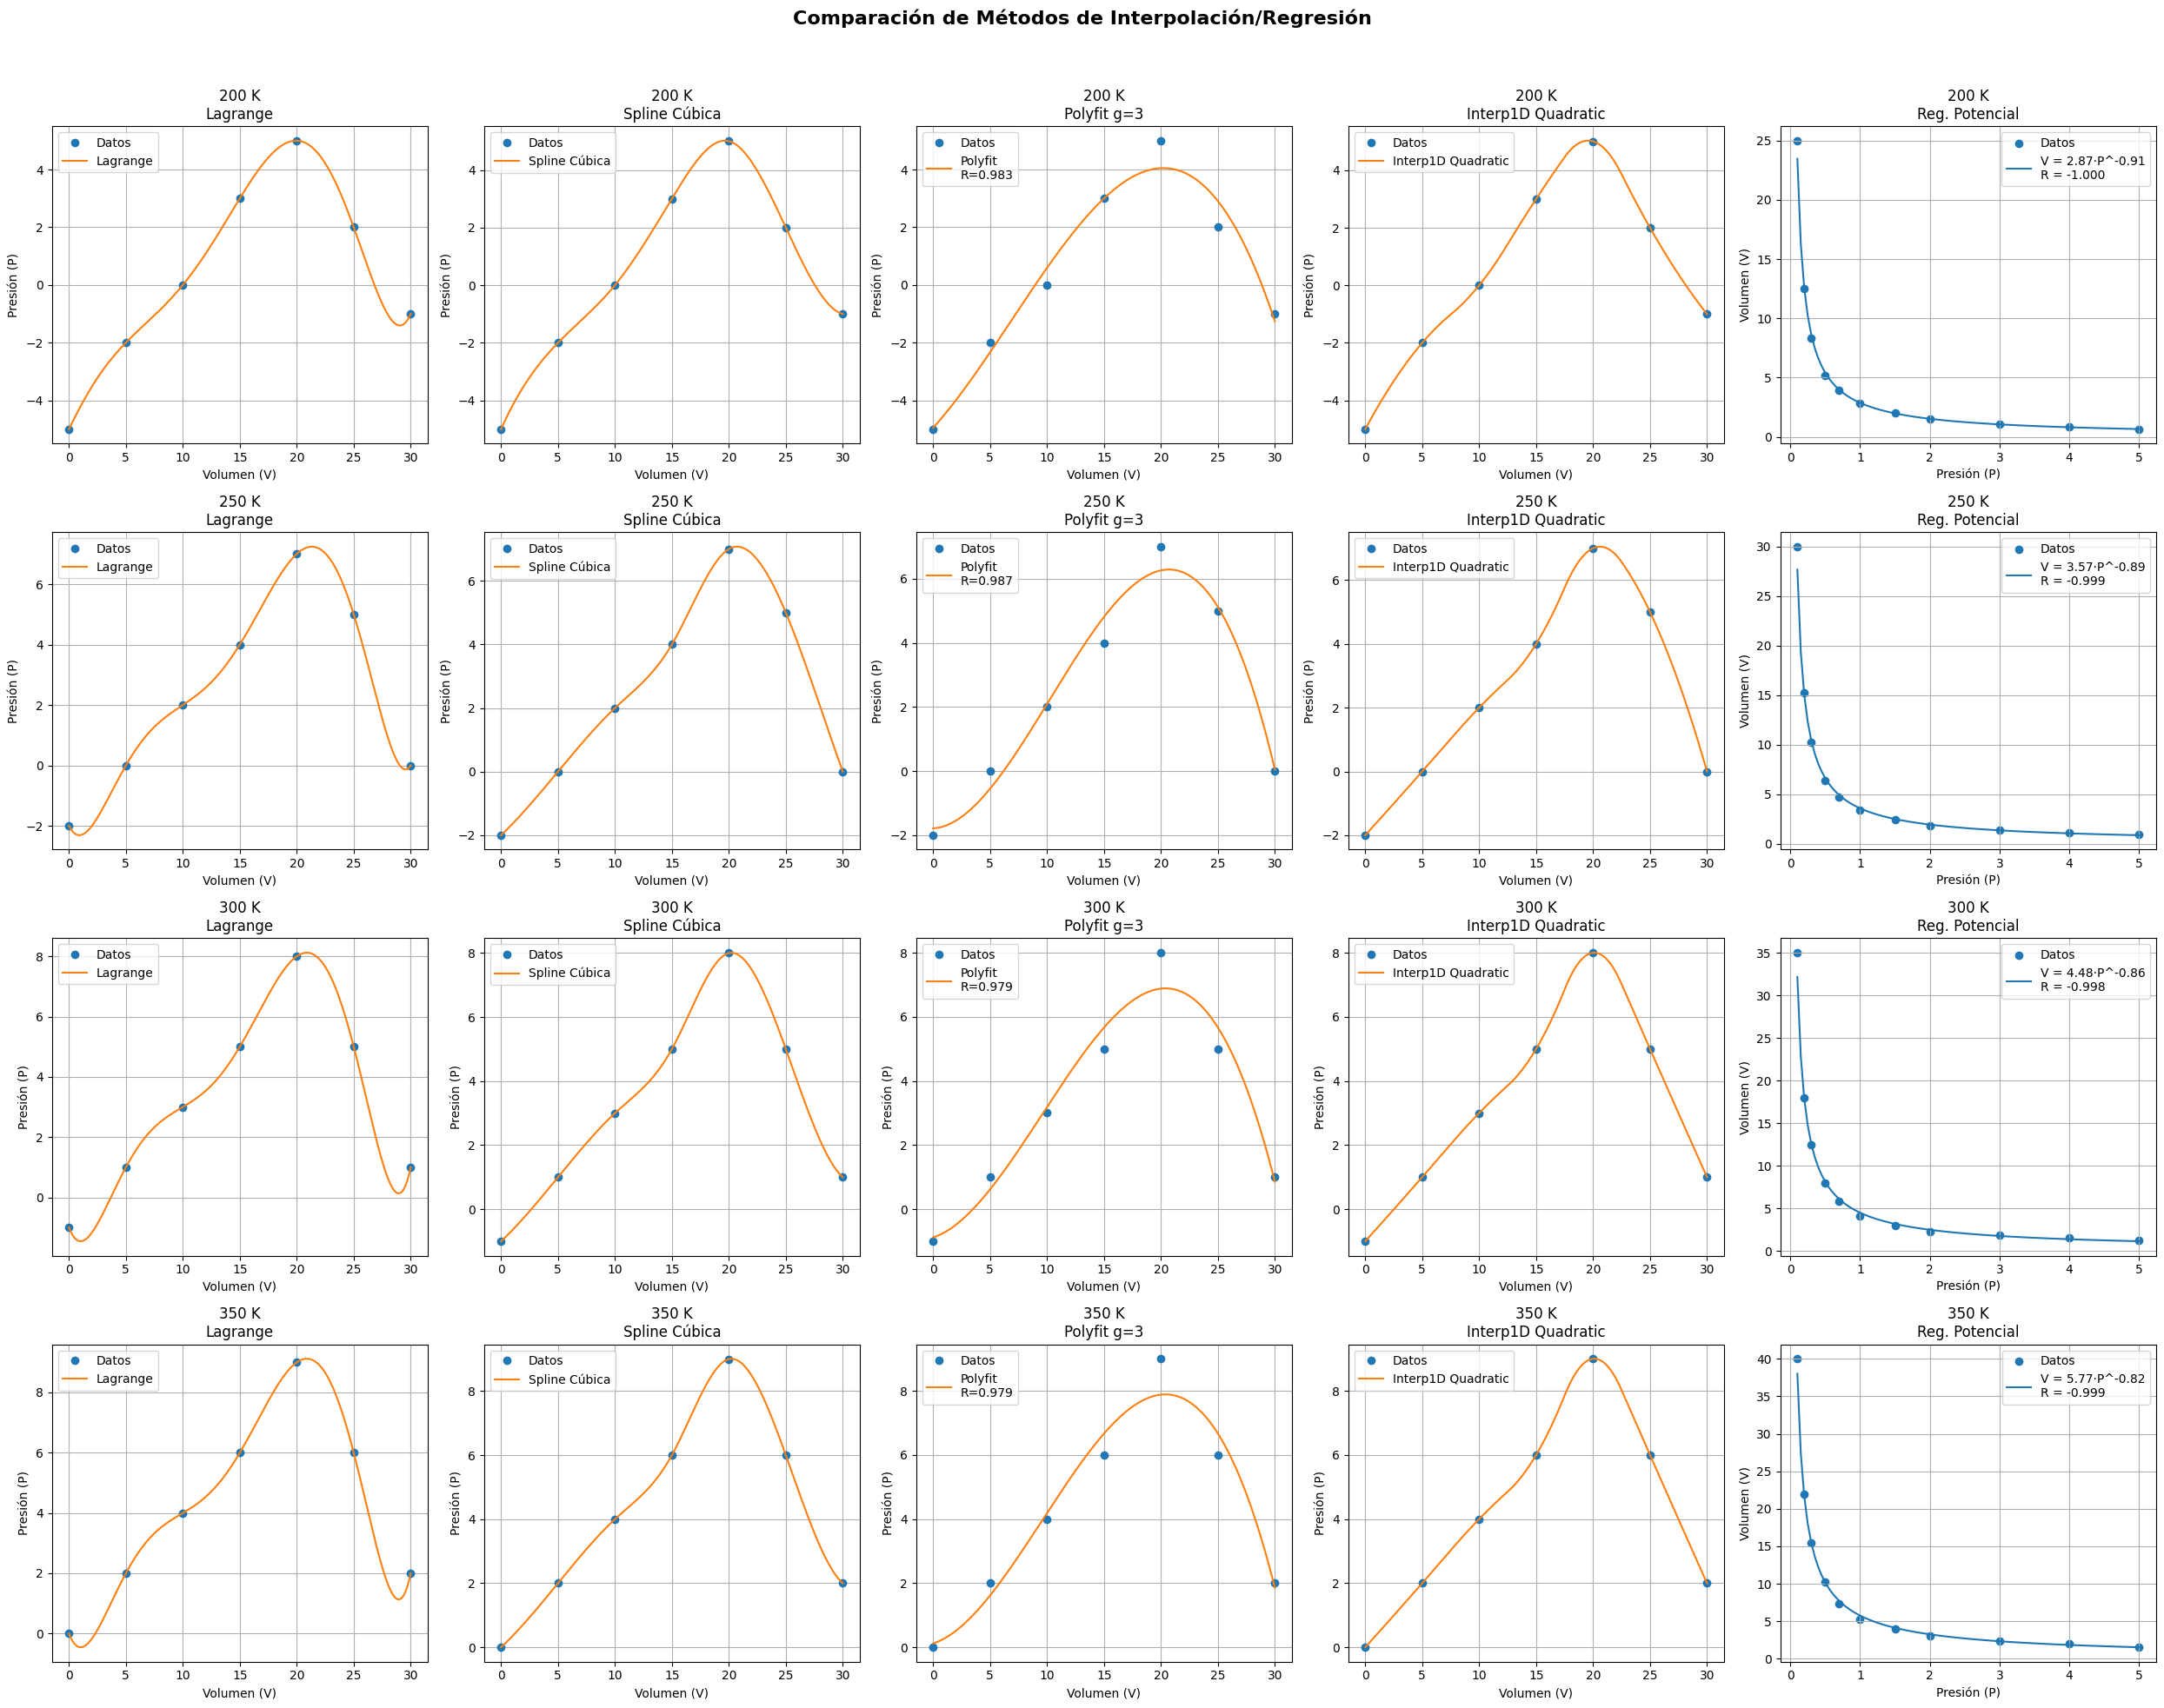

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, interp1d

# -------------------------------------------------------------------------
# DATOS INTERPOLACIÓN (P en función de V)
# -------------------------------------------------------------------------
V_200 = np.array([0,   5,  10,  15,  20,  25,  30])
P_200 = np.array([-5, -2,   0,   3,   5,   2,  -1])

V_250 = np.array([0,   5,  10,  15,  20,  25,  30])
P_250 = np.array([-2,  0,   2,   4,   7,   5,   0])

V_300 = np.array([0,   5,  10,  15,  20,  25,  30])
P_300 = np.array([-1,  1,   3,   5,   8,   5,   1])

V_350 = np.array([0,   5,  10,  15,  20,  25,  30])
P_350 = np.array([0,   2,   4,   6,   9,   6,   2])

temperaturas = [200, 250, 300, 350]
lista_V = [V_200, V_250, V_300, V_350]
lista_P = [P_200, P_250, P_300, P_350]

# -------------------------------------------------------------------------
# DATOS PARA REGRESIÓN POTENCIAL 
# -------------------------------------------------------------------------
datos_potencial = {
    "200": {
        "P": np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]),
        "V": np.array([25.0, 12.5, 8.3, 5.2, 3.9, 2.8, 2.0, 1.5, 1.1, 0.85, 0.65])
    },
    "250": {
        "P": np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]),
        "V": np.array([30.0, 15.2, 10.2, 6.4, 4.7, 3.4, 2.4, 1.8, 1.4, 1.1, 0.9])
    },
    "300": {
        "P": np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]),
        "V": np.array([35.0, 18.0, 12.5, 8.0, 5.8, 4.1, 3.0, 2.3, 1.8, 1.5, 1.2])
    },
    "350": {
        "P": np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0]),
        "V": np.array([40.0, 22.0, 15.5, 10.2, 7.4, 5.3, 4.0, 3.1, 2.4, 2.0, 1.6])
    }
}

# -------------------------------------------------------------------------
# CONFIGURACIÓN DE LA FIGURA
# -------------------------------------------------------------------------
fig, axs = plt.subplots(4, 5, figsize=(25, 20))
fig.suptitle('Comparación de Métodos de Interpolación/Regresión', fontsize=16, fontweight='bold')
grado_poly = 3

for i, (T, V, P) in enumerate(zip(temperaturas, lista_V, lista_P)):
    V_dense = np.linspace(V.min(), V.max(), 200)

    # (1) Lagrange
    ax = axs[i, 0]
    try:
        poly_lagrange = lagrange(V, P)
        ax.plot(V, P, 'o', label='Datos')
        ax.plot(V_dense, poly_lagrange(V_dense), label='Lagrange')
    except:
        pass
    ax.set_title(f'{T} K\nLagrange')
    ax.set_xlabel('Volumen (V)')
    ax.set_ylabel('Presión (P)')
    ax.grid(True)
    ax.legend()

    # (2) Spline cúbica
    ax = axs[i, 1]
    try:
        spline_cub = CubicSpline(V, P)
        ax.plot(V, P, 'o', label='Datos')
        ax.plot(V_dense, spline_cub(V_dense), label='Spline Cúbica')
    except:
        pass
    ax.set_title(f'{T} K\nSpline Cúbica')
    ax.set_xlabel('Volumen (V)')
    ax.set_ylabel('Presión (P)')
    ax.grid(True)
    ax.legend()

    # (3) Polyfit grado 3 con R
    ax = axs[i, 2]
    try:
        coef_poly = np.polyfit(V, P, grado_poly)
        poly_model = np.poly1d(coef_poly)
        P_pred = poly_model(V)
        R_poly = np.corrcoef(P, P_pred)[0, 1]
        ax.plot(V, P, 'o', label='Datos')
        ax.plot(V_dense, poly_model(V_dense), label=f'Polyfit\nR={R_poly:.3f}')
    except:
        pass
    ax.set_title(f'{T} K\nPolyfit g={grado_poly}')
    ax.set_xlabel('Volumen (V)')
    ax.set_ylabel('Presión (P)')
    ax.grid(True)
    ax.legend()

    # (4) Interpolación cuadrática
    ax = axs[i, 3]
    try:
        interp_quad = interp1d(V, P, kind='quadratic')
        ax.plot(V, P, 'o', label='Datos')
        ax.plot(V_dense, interp_quad(V_dense), label='Interp1D Quadratic')
    except:
        pass
    ax.set_title(f'{T} K\nInterp1D Quadratic')
    ax.set_xlabel('Volumen (V)')
    ax.set_ylabel('Presión (P)')
    ax.grid(True)
    ax.legend()

    # (5) Regresión de potencia con R
    ax = axs[i, 4]
    T_key = str(T)
    if T_key in datos_potencial:
        P_pos = datos_potencial[T_key]["P"]
        V_pos = datos_potencial[T_key]["V"]

        logP = np.log(P_pos)
        logV = np.log(V_pos)
        b, loga = np.polyfit(logP, logV, 1)
        a = np.exp(loga)
        R_pot = np.corrcoef(logP, logV)[0, 1]

        P_fit = np.linspace(P_pos.min(), P_pos.max(), 100)
        V_fit = a * P_fit ** b

        ax.scatter(P_pos, V_pos, label='Datos')
        ax.plot(P_fit, V_fit, label=f'V = {a:.2f}·P^{b:.2f}\nR = {R_pot:.3f}')
    else:
        ax.text(0.5, 0.5, 'Datos no disponibles', ha='center', va='center')
    ax.set_title(f'{T} K\nReg. Potencial')
    ax.set_xlabel('Presión (P)')
    ax.set_ylabel('Volumen (V)')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sympy import symbols, simplify

def diferencias_divididas_hermite(data_points, derivatives_info):
    """Calcula la tabla de diferencias divididas para interpolación de Hermite."""
    n = len(data_points)
    z = []
    Q = []
    
    for i, (xi, yi) in enumerate(data_points):
        z.append(xi)
        Q.append([yi])
        
        if xi in derivatives_info:
            z.append(xi)
            Q.append([yi])
            Q[-1].append(derivatives_info[xi])  # Primera derivada en puntos repetidos
            Q[-2].append((Q[-2][0] - Q[-3][0]) / (z[-2] - z[-3]) if len(Q) > 2 else derivatives_info[xi])
    
    # Inicializar la tabla de diferencias divididas con ceros
    m = len(z)
    for row in Q:
        while len(row) < m:
            row.append(0)
    
    # Calcular las diferencias divididas correctamente
    for j in range(1, m):
        for i in range(m - j):
            if j == 1 and z[i] == z[i + 1]:
                Q[i][j] = Q[i + 1][1]  # Usar la derivada cuando hay repetición del mismo x
            else:
                Q[i][j] = (Q[i + 1][j - 1] - Q[i][j - 1]) / (z[i + j] - z[i])
    
    return z, np.array(Q)

def construir_polinomio_simplificado_hermite(coef, x):
    """Construye y simplifica el polinomio de interpolación de Hermite."""
    x_sym = symbols('x')
    n = len(coef[0])
    polinomio = coef[0, 0]
    terminos = 1
    polinomio_expr = polinomio
    
    for i in range(1, n):
        terminos *= (x_sym - x[i - 1])
        polinomio_expr += coef[0, i] * terminos
    
    return simplify(polinomio_expr)

# Datos de ejemplo
data_points = [(200,2.8),(250,3.4),(300, 4.1),(350, 5.3)]
derivatives_info = {300: 0.019} # Derivadas en algunos puntos

# Calcular la tabla de diferencias divididas para Hermite
z, tabla_coef_hermite = diferencias_divididas_hermite(data_points, derivatives_info)
tabla_df_hermite = pd.DataFrame(tabla_coef_hermite).fillna('')

# Calcular el polinomio simplificado
polinomio_simplificado_hermite = construir_polinomio_simplificado_hermite(tabla_coef_hermite, z)

# Mostrar la tabla y el polinomio simplificado
print("Tabla de Diferencias Divididas para Hermite:")
print(tabla_df_hermite)
print("\nPolinomio de Interpolación de Hermite (Simplificado):")
print(polinomio_simplificado_hermite)



Tabla de Diferencias Divididas para Hermite:
     0      1        2             3             4
0  2.8  0.012  0.00002  8.000000e-07 -5.333333e-09
1  3.4  0.014  0.00010  0.000000e+00  0.000000e+00
2  4.1  0.019  0.00010  0.000000e+00  0.000000e+00
3  4.1  0.024  0.00000  0.000000e+00  0.000000e+00
4  5.3  0.000  0.00000  0.000000e+00  0.000000e+00

Polinomio de Interpolación de Hermite (Simplificado):
-5.33333333333334e-9*x**4 + 6.40000000000001e-6*x**3 - 0.00276666666666667*x**2 + 0.527000000000001*x - 34.6000000000001


In [26]:

import numpy as np
import pandas as pd
from scipy.optimize import newton

# ----------------------------
# Constantes y condiciones
# ----------------------------
R = 8.314  # J/mol·K
T = 250  # K

# Propiedades del metano
Tc = 190.56  # K
Pc = 4.59  # MPa
w = 0.011  # Factor acéntrico

# ----------------------------
# Parámetros Peng-Robinson
# ----------------------------
Tr = T / Tc
k = 0.37 + 1.5 * w - 0.26 * w**2
alpha = (1 + k * (1 - np.sqrt(Tr)))**2
a = 0.4572 * (R**2 * Tc**2 / (Pc * 1e6)) * alpha  # Convertir Pc a Pa
b = 0.077 * R * Tc / (Pc * 1e6)  # en Pa

# ----------------------------
# Presiones experimentales (MPa)
# ----------------------------
P_list = np.array([0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0])

# ----------------------------
# Regresión potencial
# ----------------------------
# V = a_reg * P^b_reg
a_reg = 3.57
b_reg = -0.89

# ----------------------------
# Clase para contar iteraciones
# ----------------------------
class PengRobinsonCounter:
    def __init__(self, P_Pa):
        self.P_Pa = P_Pa
        self.count = 0

    def __call__(self, V):
        self.count += 1
        term1 = R * T / (V - b)
        term2 = a / (V**2 + 2 * b * V - b**2)
        return term1 - term2 - self.P_Pa

# ----------------------------
# Cálculos y comparación
# ----------------------------
results = []

for P_MPa in P_list:
    P_Pa = P_MPa * 1e6
    V0 = R * T / P_Pa  # Estimación inicial (gas ideal)

    pr_eq = PengRobinsonCounter(P_Pa)

    try:
        V_peng = newton(pr_eq, V0, maxiter=100, tol=1e-6)
    except RuntimeError:
        V_peng = np.nan

    # Volumen estimado por regresión
    V_reg = a_reg * P_MPa**b_reg if P_MPa > 0 else np.nan

    # Error absoluto
    error = abs(V_peng - V_reg)if not np.isnan(V_peng) and not np.isnan(V_reg) else np.nan

    results.append({
        "P (MPa)": P_MPa,
        "V_Peng (m³/mol)": V_peng,
        "V_Regresión (m³/mol)": V_reg,
        "Error (Peng - Reg)": error,
        "Iteraciones": pr_eq.count
    })

# ----------------------------
# Mostrar tabla de resultados
# ----------------------------
df_comparacion = pd.DataFrame(results)
print(df_comparacion)


    P (MPa)  V_Peng (m³/mol)  V_Regresión (m³/mol)  Error (Peng - Reg)  \
0       0.1         0.020704             27.712022           27.691318   
1       0.2         0.010312             14.953798           14.943486   
2       0.3         0.006848             10.423902           10.417054   
3       0.5         0.004076              6.615839            6.611762   
4       0.7         0.002889              4.903780            4.900891   
5       1.0         0.001998              3.570000            3.568002   
6       1.5         0.001305              2.488554            2.487248   
7       2.0         0.000959              1.926422            1.925464   
8       3.0         0.000613              1.342859            1.342246   
9       4.0         0.000440              1.039525            1.039085   
10      5.0         0.000336              0.852285            0.851949   

    Iteraciones  
0             3  
1             4  
2             4  
3             4  
4             4  
5  

RESULTADOS:

Tolerancia: 1e-02
  Bisección -> T = 134.6343750000, Iteraciones = 5
  Secante   -> T = 134.6344084119, Iteraciones = 8

Tolerancia: 1e-03
  Bisección -> T = 134.6349609375, Iteraciones = 9
  Secante   -> T = 134.6349958849, Iteraciones = 9

Tolerancia: 1e-10
  Bisección -> T = 134.6349743999, Iteraciones = 32
  Secante   -> T = 134.6349743999, Iteraciones = 12



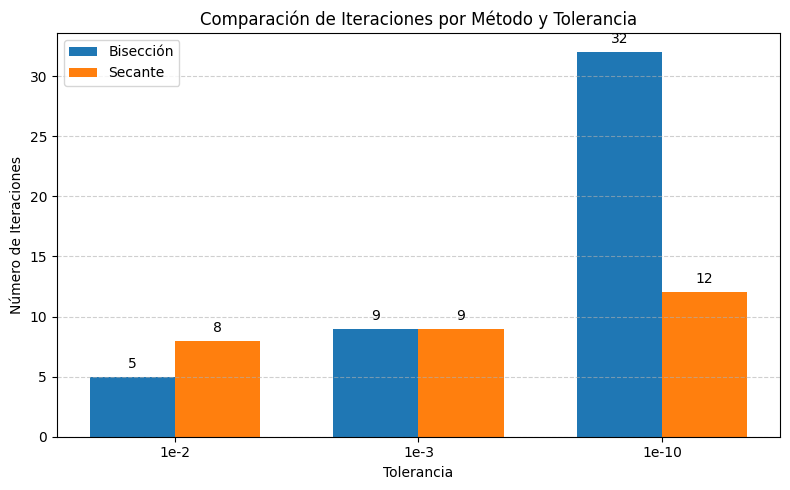

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
R = 8.314  # J/mol·K
P = 1e6    # Pa
C_target = 6e-4  # m^6/kg^2

# Polinomio de Hermite para V(T)
def V(T):
    return (-5.3333e-9)*T**4 + (6.4e-6)*T**3 - 0.00277*T**2 + 0.527*T - 34.6

# Coeficiente B(T)
def B(T):
    return -0.199 + 0.20 * np.exp(-1131 / T**2)

# Función objetivo f(T) = C(T) - C_target
def f(T):
    v = V(T)
    z = (P * v) / (R * T)
    C_T = (z - 1 - B(T)/v) * v**2
    return C_T - C_target

# Método de Bisección
def biseccion_raiz(a, b, tol):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos.")
    
    n_iter = 0
    while abs(b - a) > tol:
        c = (a + b) / 2
        fc = f(c)
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
        n_iter += 1
    return c, n_iter

# Método de la Secante
def secante_raiz(x0, x1, tol):
    n_iter = 0
    while abs(x1 - x0) > tol:
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        x0, x1 = x1, x2
        n_iter += 1
    return x1, n_iter

# Intervalo válido
a, b = 134.55, 134.85
tolerancias = [1e-2, 1e-3, 1e-10]
labels_tol = ['1e-2', '1e-3', '1e-10']

iter_bis = []
iter_sec = []

print("RESULTADOS:\n")
for tol in tolerancias:
    raiz_bis, it_bis = biseccion_raiz(a, b, tol)
    raiz_sec, it_sec = secante_raiz(a, b, tol)
    iter_bis.append(it_bis)
    iter_sec.append(it_sec)
    print(f"Tolerancia: {tol:.0e}")
    print(f"  Bisección -> T = {raiz_bis:.10f}, Iteraciones = {it_bis}")
    print(f"  Secante   -> T = {raiz_sec:.10f}, Iteraciones = {it_sec}\n")

# Gráfica de barras agrupadas
x = np.arange(len(labels_tol))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, iter_bis, width, label='Bisección')
bars2 = ax.bar(x + width/2, iter_sec, width, label='Secante')

ax.set_xlabel('Tolerancia')
ax.set_ylabel('Número de Iteraciones')
ax.set_title('Comparación de Iteraciones por Método y Tolerancia')
ax.set_xticks(x)
ax.set_xticklabels(labels_tol)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


C(T) objetivo = 1.0e-04
  Bisección -> T = 134.578711, Iteraciones = 9
  Secante   -> T = 134.578448, Iteraciones = 7

C(T) objetivo = 8.5e-04
  Bisección -> T = 134.650195, Iteraciones = 9
  Secante   -> T = 134.649685, Iteraciones = 9



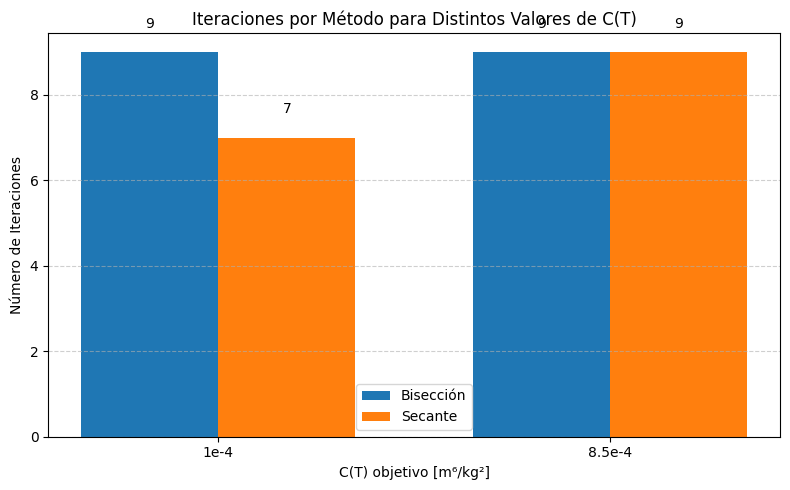

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
R = 8.314  # J/mol·K
P = 1e6    # Pa
tolerancia = 1e-3
valores_C = [1e-4, 8.5e-4]
labels_ct = ['1e-4', '8.5e-4']

# Polinomio de Hermite para V(T)
def V(T):
    return (-5.3333e-9)*T**4 + (6.4e-6)*T**3 - 0.00277*T**2 + 0.527*T - 34.6

# Coeficiente B(T)
def B(T):
    return -0.199 + 0.20 * np.exp(-1131 / T**2)

# Intervalo estimado válido
a, b = 134.55, 134.85

# Guardar resultados
iter_bis = []
iter_sec = []
raices_bis = []
raices_sec = []

for C_target in valores_C:
    # Definir f(T) adaptado a cada C_target
    def f(T):
        v = V(T)
        z = (P * v) / (R * T)
        C_T = (z - 1 - B(T)/v) * v**2
        return C_T - C_target

    # Método de Bisección
    def biseccion(a, b, tol):
        fa, fb = f(a), f(b)
        if fa * fb > 0:
            raise ValueError("f(a) y f(b) deben tener signos opuestos.")
        n_iter = 0
        while abs(b - a) > tol:
            c = (a + b) / 2
            fc = f(c)
            if fa * fc < 0:
                b, fb = c, fc
            else:
                a, fa = c, fc
            n_iter += 1
        return c, n_iter

    # Método de la Secante
    def secante(x0, x1, tol):
        n_iter = 0
        while abs(x1 - x0) > tol:
            f0, f1 = f(x0), f(x1)
            if f1 - f0 == 0:
                break
            x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
            x0, x1 = x1, x2
            n_iter += 1
        return x1, n_iter

    # Ejecutar métodos
    raiz_b, it_b = biseccion(a, b, tolerancia)
    raiz_s, it_s = secante(a, b, tolerancia)

    # Guardar resultados
    raices_bis.append(raiz_b)
    raices_sec.append(raiz_s)
    iter_bis.append(it_b)
    iter_sec.append(it_s)

    print(f"C(T) objetivo = {C_target:.1e}")
    print(f"  Bisección -> T = {raiz_b:.6f}, Iteraciones = {it_b}")
    print(f"  Secante   -> T = {raiz_s:.6f}, Iteraciones = {it_s}\n")

# --------------------
# GRAFICAR RESULTADOS
# --------------------

x = np.arange(len(labels_ct))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, iter_bis, width, label='Bisección')
bars2 = ax.bar(x + width/2, iter_sec, width, label='Secante')

ax.set_xlabel('C(T) objetivo [m⁶/kg²]')
ax.set_ylabel('Número de Iteraciones')
ax.set_title('Iteraciones por Método para Distintos Valores de C(T)')
ax.set_xticks(x)
ax.set_xticklabels(labels_ct)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Mostrar valores encima de las barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{int(yval)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
